In [1]:

import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
from scipy.io import loadmat              
import rioxarray
import rasterio
from create_raster import make_swan_raster_StructuredGrid

In [2]:
#matfile = r'C:\Users\tkalra\Desktop\NFWP_Swan_coral_USVirgin\66113_Coral_Reefs_PR\SwanRuns\Restored_Reef\1perc\1perc_restored_outs.mat'
matfile = r'C:\Users\tkalra\Desktop\NFWP_Swan_coral_USVirgin\69532_Coral_Reefs_St_Croix\Swan_Runs\Degraded_Reef\1perc\1perc_degraded_outs.mat'

#C:\Users\tkalra\Desktop\NFWP_Swan_coral_USVirgin\66113_Coral_Reefs_PR\SwanRuns\Restored_Reef\1perc
outfile_Hsig = 'output_raster_Hsig.tiff'

outfile_Setup = 'output_raster_Setup.tiff'

In [3]:
gridsize = 10  # in meter
gridx = 483 #j direction + 1 from swan file 
gridy = 278 #i direction + 1 from swan file 
xMin = 389822 #this is your x origin in state plane m (or whatever you used)
yMin = 192378 #this is your y origin in state plane m (or whatever you used)
            
EPSG = 32163 # EPSGS correspondign to USVI (ST.Croix )
angle_degrees = 0.0  # Angle of the grid

m_to_feet = 3.28084
varname = "Hsig"
# Get the Hsig 
make_swan_raster_StructuredGrid(outfile_Hsig, matfile, varname, m_to_feet, EPSG, xMin, yMin, gridx, gridy, gridsize, angle_degrees)

#varname = "Setup"
# Get the Wave setup 
#make_swan_raster_StructuredGrid(outfile_Setup, matfile, varname, m_to_feet, EPSG, xMin, yMin, gridx, gridy, gridsize, angle_degrees)


raster finished


c:\Users\tkalra\Desktop\NFWP_Swan_coral_USVirgin\69532_Coral_Reefs_St_Croix\Swan_Post_runs\create_raster.py:111: RuntimeWarning: invalid value encountered in multiply
  var = matfile[varname]*m_to_feet


In [4]:
# Open this newly created tiff on the SWAN grid 
coarse_data = rioxarray.open_rasterio('output_raster_Hsig.tiff')

In [5]:
# Grid file path specified 
# this is the finer TIFF file 
gridfile = r'C:\Users\tkalra\Desktop\NFWP_Swan_coral_USVirgin\69532_Coral_Reefs_St_Croix\Grid\restored_USVI_rasterio.tif'
finer_xds = rioxarray.open_rasterio(gridfile) 

In [6]:
# Interpolate wave height from SWAN grid to the topobathy tiff (merged tiff)

ds_new = coarse_data.interp(y=finer_xds.y, x=finer_xds.x, method='nearest')
ds_new = ds_new.squeeze()

grid_new='new_raster.tif'

with rasterio.open(gridfile) as src:
    # Read the old values 
    array = src.read(1)
    profile = src.profile 
    # Replace with newly interpolated values 

array = ds_new

with rasterio.open(grid_new, 'w', **profile) as dst:
    dst.write(array, 1)

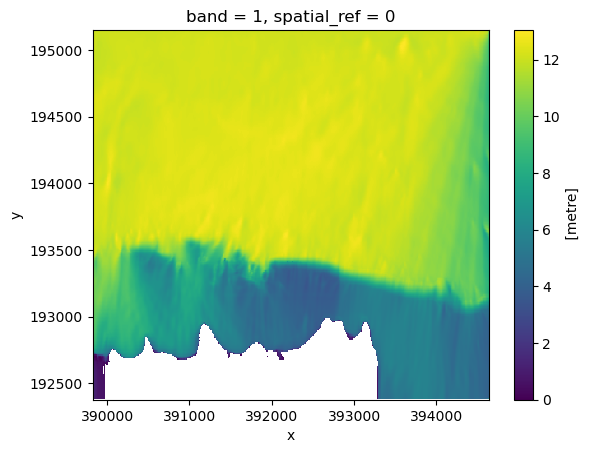

In [9]:
fine_data = rioxarray.open_rasterio(grid_new)
fine_data.plot()

In [7]:
res = finer_xds.rio.resolution()
print(res)
fine_grid = finer_xds.squeeze()
print(np.shape(fine_grid))
finer_xds


(1.0, -1.0)
(2771, 4821)


<xarray.DataArray (band: 1, y: 2771, x: 4821)>
[13358991 values with dtype=float32]
Coordinates:
  * band         (band) int32 1
  * x            (x) float64 3.898e+05 3.898e+05 ... 3.946e+05 3.946e+05
  * y            (y) float64 1.951e+05 1.951e+05 ... 1.924e+05 1.924e+05
    spatial_ref  int32 0
Attributes:
    AREA_OR_POINT:  Area
    units:          metre
    _FillValue:     -999999.0
    scale_factor:   1.0
    add_offset:     0.0